# Comparison between the types for the ages and genders

Questions

- What are the differences between the type for the different combinations of ages and genders?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between genders and ages (after controlling type)
GF_SPF_F_8w = results(dge,contrast= c(0,0,1,0,0,0,0,0,0,0), alpha=0.05, test="Wald")
GF_SPF_M_8w = results(dge,contrast= c(0,0,1,0,0,0,0,1,0,0), alpha=0.05, test="Wald")
GF_SPF_F_52w = results(dge,contrast= c(0,0,1,0,0,0,0,0,0,1), alpha=0.05, test="Wald")
GF_SPF_M_52w = results(dge,contrast= c(0,0,1,0,0,0,0,1,0,1), alpha=0.05, test="Wald")
GF_SPF_F_104w = results(dge,contrast= c(0,0,1,0,0,0,0,0,1,0), alpha=0.05, test="Wald")
GF_SPF_M_104w = results(dge,contrast= c(0,0,1,0,0,0,0,1,1,0), alpha=0.05, test="Wald")
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")
to_comp = c("GF VS SPF (F, 8w)", "GF VS SPF (M, 8w)", "GF VS SPF (F, 52w)", "GF VS SPF (M, 52w)", "GF VS SPF (F, 104w)", "GF VS SPF (M, 104w)")

# Stats

In [7]:
# Stats
type_gender_age_stats = matrix(0, nrow=6, ncol=3)
rownames(type_gender_age_stats) = to_comp
colnames(type_gender_age_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
type_gender_age_stats[1,] = get_stats_padj(GF_SPF_F_8w)
type_gender_age_stats[2,] = get_stats_padj(GF_SPF_M_8w)
type_gender_age_stats[3,] = get_stats_padj(GF_SPF_F_52w)
type_gender_age_stats[4,] = get_stats_padj(GF_SPF_M_52w)
type_gender_age_stats[5,] = get_stats_padj(GF_SPF_F_104w)
type_gender_age_stats[6,] = get_stats_padj(GF_SPF_M_104w)
type_gender_age_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
GF VS SPF (F, 8w)    392             192                       
GF VS SPF (M, 8w)    161              76                       
GF VS SPF (F, 52w)   738             316                       
GF VS SPF (M, 52w)   393             145                       
GF VS SPF (F, 104w) 2038             846                       
GF VS SPF (M, 104w) 2172             898                       
                    LFC < 0 (Wald padj < 0.05)
GF VS SPF (F, 8w)    200                      
GF VS SPF (M, 8w)     85                      
GF VS SPF (F, 52w)   422                      
GF VS SPF (M, 52w)   248                      
GF VS SPF (F, 104w) 1192                      
GF VS SPF (M, 104w) 1274

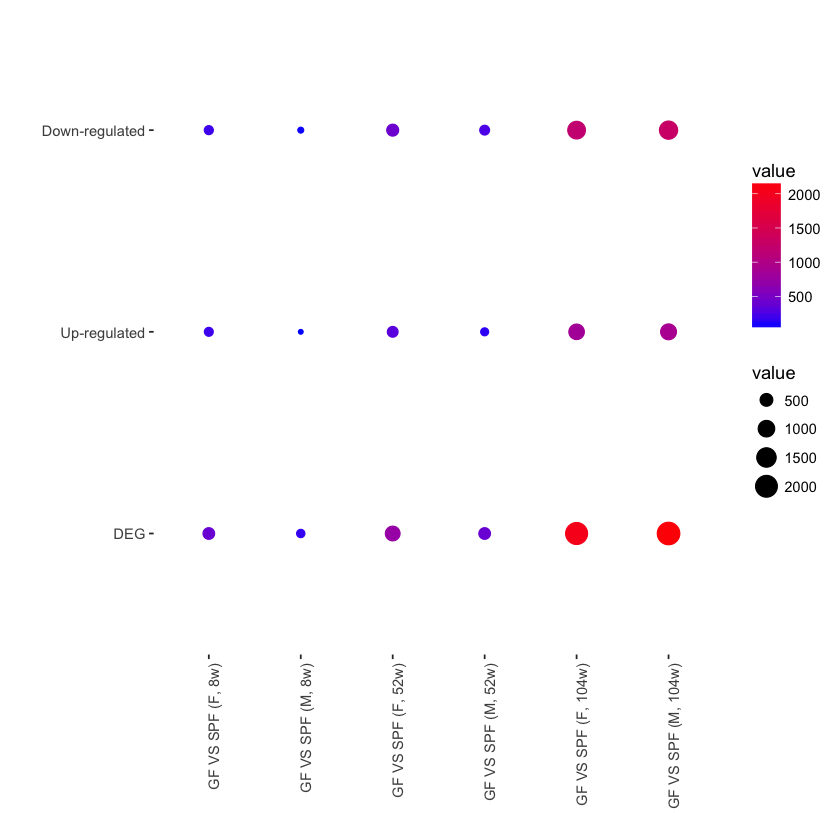

In [8]:
plot_stat_mat(type_gender_age_stats)

# Differentially expressed genes

In [9]:
type_gender_age_data = list(GF_SPF_F_8w, GF_SPF_M_8w, GF_SPF_F_52w, GF_SPF_M_52w, GF_SPF_F_104w, GF_SPF_M_104w)
names(type_gender_age_data) = to_comp
type_gender_age_deg = extract_diff_expr_genes(type_gender_age_data, "type-effect/type_gender_age/")

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”

# Comparison of the numbers per ages

Differentially expressed genes

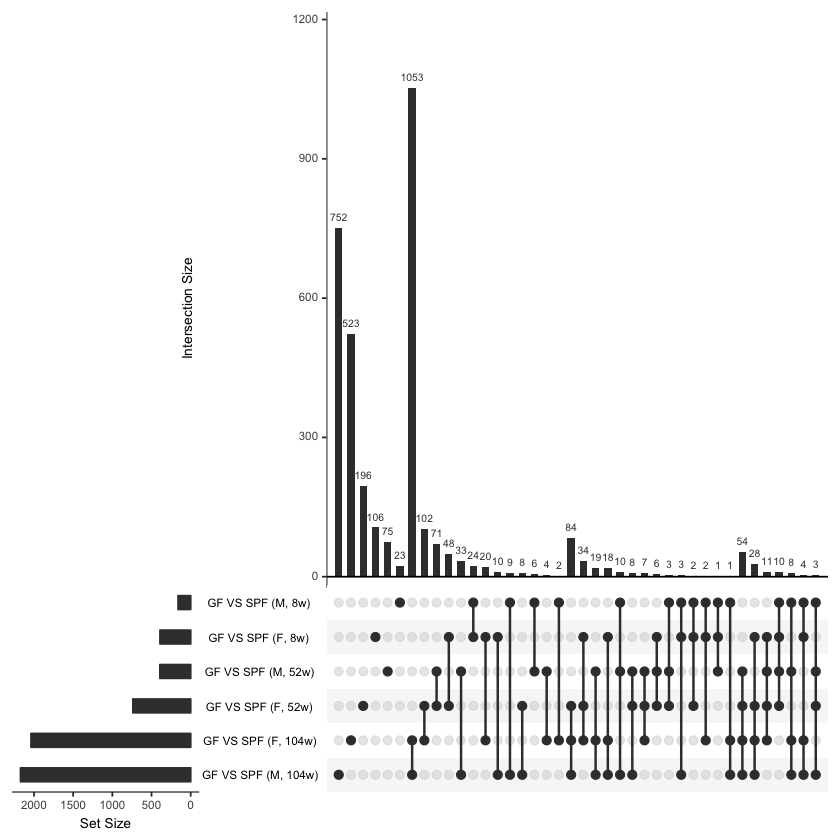

In [10]:
# Differentially expressed genes
upset(as.data.frame(type_gender_age_deg$deg), nsets = 7)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

GF vs SPF | 8w | 52w | 104w
--- | --- | ---
F | | |
M | | |

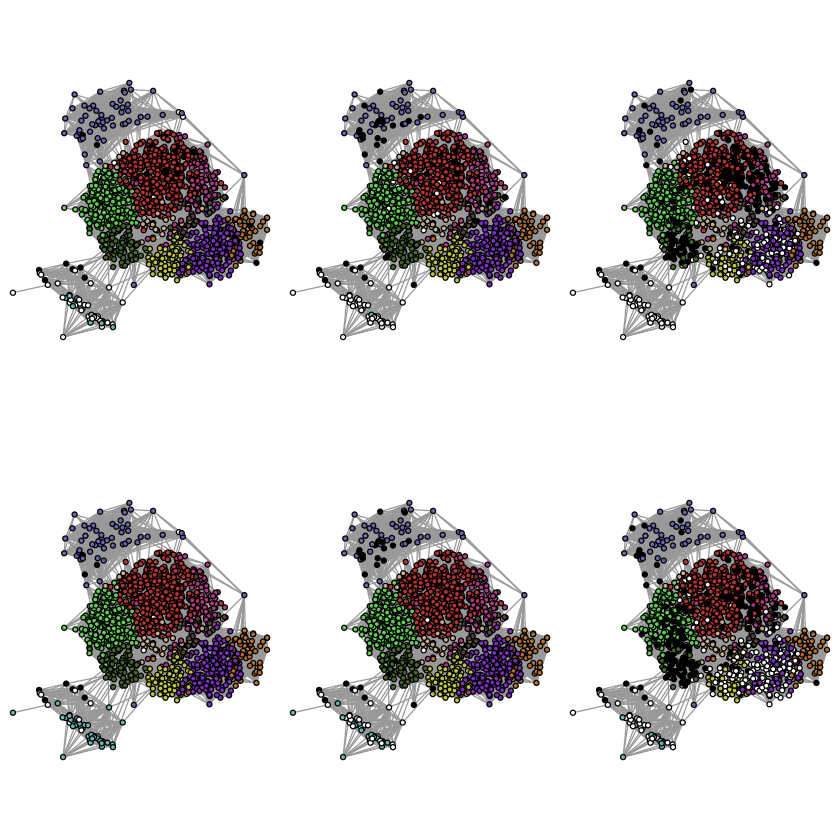

In [11]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
col_GF_vs_SPF_8w_F = get_deg_colors(type_gender_age_deg, "GF VS SPF (F, 8w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_8w_M = get_deg_colors(type_gender_age_deg, "GF VS SPF (M, 8w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_52w_F = get_deg_colors(type_gender_age_deg, "GF VS SPF (F, 52w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_52w_M = get_deg_colors(type_gender_age_deg, "GF VS SPF (M, 52w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_104w_F = get_deg_colors(type_gender_age_deg, "GF VS SPF (F, 104w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_104w_M = get_deg_colors(type_gender_age_deg, "GF VS SPF (M, 104w)", connected_gene_colors, module_nb)

plot_net_with_layout(net, col_GF_vs_SPF_8w_F, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_52w_F, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_104w_F, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_8w_M, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_52w_M, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_104w_M, pal2, layout, add_legend = FALSE)

# GO analysis

In [12]:
full_go_desc = type_gender_age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_gender_age_deg$GO_wall[[1]][,"category"]
comp = colnames(type_gender_age_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

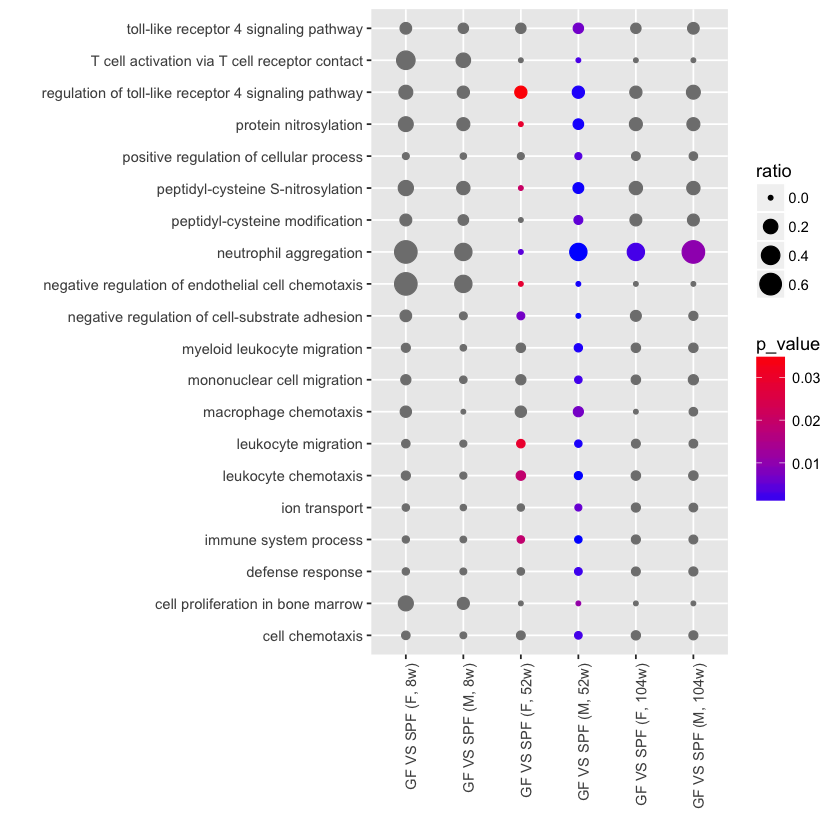

In [13]:
plot_top_go(type_gender_age_deg$over_represented_GO,
            type_gender_age_deg$GO_wall,
            "BP",
            comp,
            20)

Network based on description similarity

In [14]:
BP_network = create_GO_network(type_gender_age_deg, "BP", BP_GO)

GF vs SPF | 8w | 52w | 104w
--- | --- | ---
F | | |
M | | |

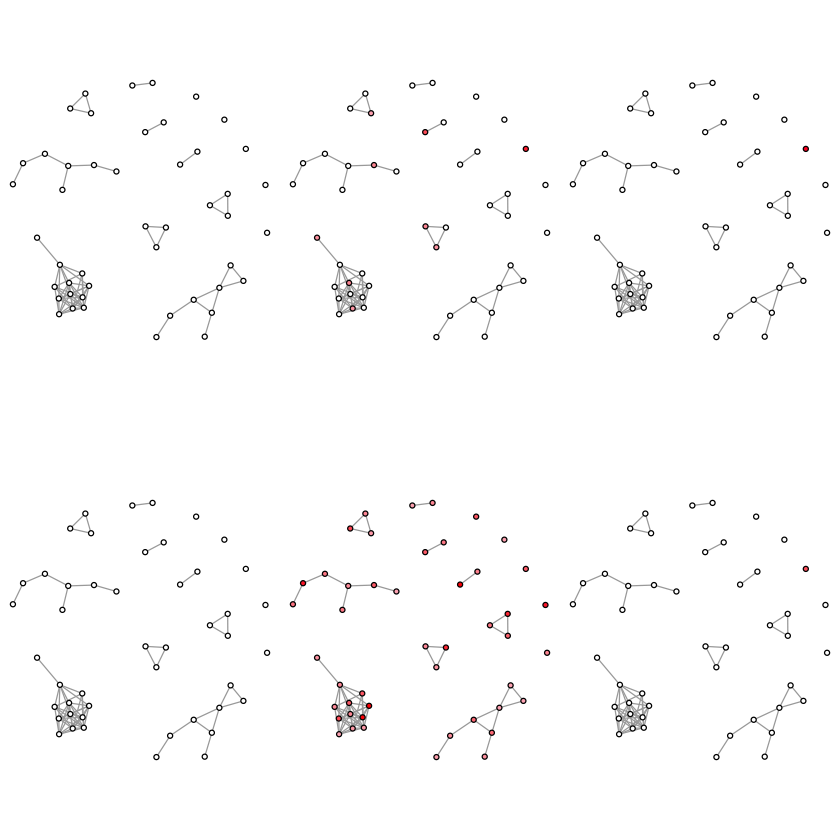

In [15]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "GF VS SPF (F, 8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (F, 52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (F, 104w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, 8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, 52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, 104w)", full_go_desc, plot_interactive = FALSE)

GF VS SPF (F, 8w)

In [16]:
# GF VS SPF (F, 8w)
plot_GO_networks(BP_network, "GF VS SPF (F, 8w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

GF VS SPF (M, 8w)

In [17]:
# GF VS SPF (M, 8w)
plot_GO_networks(BP_network, "GF VS SPF (M, 8w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

GF VS SPF (F, 52w)

In [18]:
# GF VS SPF (F, 52w)
plot_GO_networks(BP_network, "GF VS SPF (F, 52w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

GF VS SPF (M, 52w)

In [19]:
# GF VS SPF (M, 52w)
plot_GO_networks(BP_network, "GF VS SPF (M, 52w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

GF VS SPF (F, 104w)

In [20]:
# GF VS SPF (F, 104w)
plot_GO_networks(BP_network, "GF VS SPF (F, 104w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

GF VS SPF (M, 104w)

In [21]:
# GF VS SPF (M, 104w)
plot_GO_networks(BP_network, "GF VS SPF (M, 104w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 6 rows containing missing values (geom_point).”

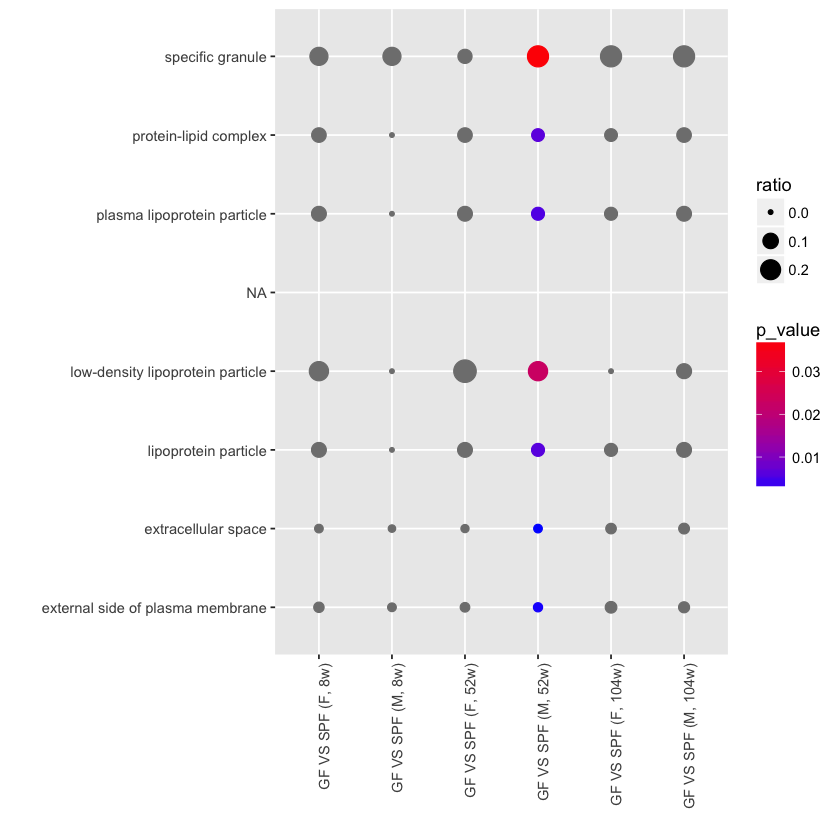

In [22]:
plot_top_go(type_gender_age_deg$over_represented_GO,
            type_gender_age_deg$GO_wall,
            "CC",
            comp,
            20)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 6 rows containing missing values (geom_point).”

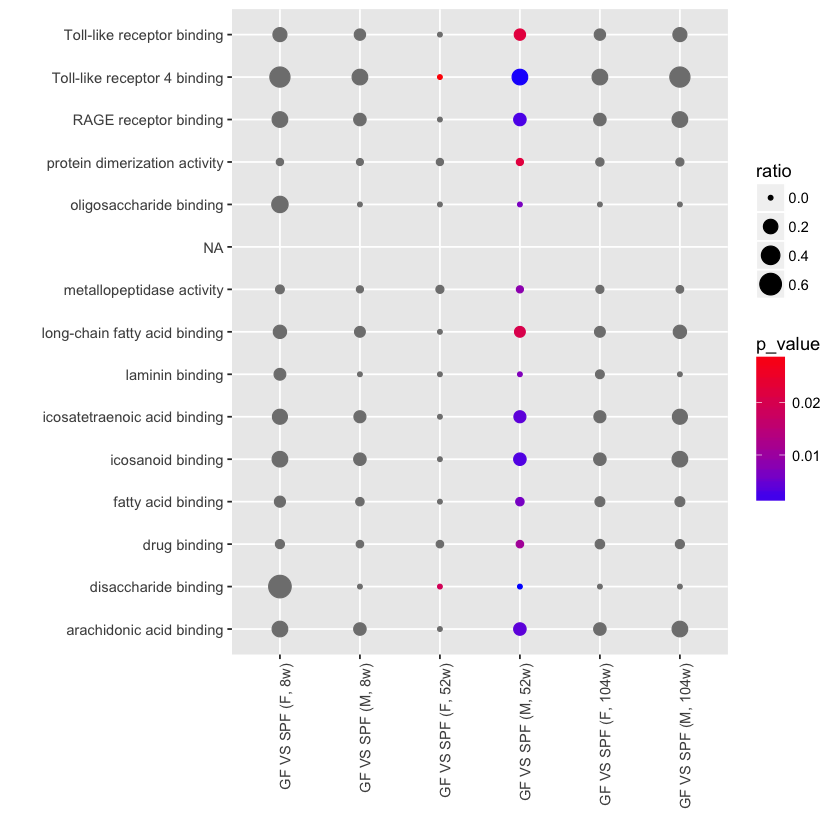

In [23]:
plot_top_go(type_gender_age_deg$over_represented_GO,
            type_gender_age_deg$GO_wall,
            "MF",
            comp,
            20)

# KEGG pathways

In [24]:
plot_kegg_pathways(type_gender_age_deg$over_represented_KEGG[,"category"],
                   type_gender_age_deg$fc_deg,
                   "../results/dge/type-effect/type_gender_age/over_repr_kegg/")

[1] "Note: 39 of 3451 unique input IDs unmapped."
[1] "Note: 39 of 3451 unique input IDs unmapped."


Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$c

Pathway graphs available at ../results/dge/type-effect/type_gender_age/over_repr_kegg/

In [25]:
plot_kegg_pathways(type_gender_age_deg$under_represented_KEGG[,"category"],
                   type_gender_age_deg$fc_deg,
                   "../results/dge/type-effect/type_gender_age/under_repr_kegg/")

[1] "Note: 39 of 3451 unique input IDs unmapped."


Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

Pathway graphs available at ../results/dge/type-effect/type_gender_age/under_repr_kegg/

# Comparison with Erny results

Protocol: 2 months old female mices (GF vs SPF)

In [26]:
# our data
GF_SPF_F_8w_fc_deg = type_gender_age_deg$fc_deg[,1]
GF_SPF_F_8w_fc_deg = GF_SPF_F_8w_fc_deg[!is.na(GF_SPF_F_8w_fc_deg)]

## Raw comparison of the results

In [27]:
# Erny data: transform the gene symbol and use log2(FC)
erny_results = read.csv("../data/erny_results.csv")
erny_results[,1] = capFirst(as.character(erny_results[,1]))
erny_results[,2] = as.character(erny_results[,2])
erny_results[,3] = log2(erny_results[,3])
erny_results[erny_results[,1] == "1700001c19rik",1] = "1700001C19Rik"
erny_results[erny_results[,1] == "Fam125a",1] = "Mvb12a"
erny_results[erny_results[,1] == "Sepw1",1] = "Selenow"
erny_results[erny_results[,1] == "Ppapdc3",1] = "Plpp7"
erny_results[erny_results[,1] == "Ccdc101",1] = "Sgf29"
erny_results[erny_results[,1] == "Tcfeb",1] = "Tfeb"
erny_results[erny_results[,1] == "2810408m09rik",1] = "Trp53rka"
erny_results[erny_results[,1] == "2300009a05rik",1] = "2300009A05Rik"
erny_results[erny_results[,1] == "2900010m23rik",1] = "Uqcc2"
erny_results[erny_results[,1] == "Ccdc55",1] = "Nsrp1"
erny_results[erny_results[,1] == "Phf15",1] = "Jade2"
erny_results[erny_results[,1] == "Mobkl2a",1] = "Mob3a"
erny_results[erny_results[,1] == "C030046i01rik",1] = "R3hdm4"
erny_results[erny_results[,1] == "H2-dmb1",1] = "H2-DMb1"
erny_results[erny_results[,1] == "D15ertd621e",1] = "Fam91a1"
erny_results[erny_results[,1] == "Bc030336",1] = "BC030336"
erny_results[erny_results[,1] == "C330007p06rik",1] = "C330007P06Rik"
erny_results[erny_results[,1] == "4931406h21rik",1] = "4931406H21Rik"
erny_results[erny_results[,1] == "Gm13253",1] = "Rps15a-ps4"
erny_results[erny_results[,1] == "Hiatl1",1] = "Mfsd14b"
erny_results[erny_results[,1] == "Bc031353",1] = "Fam214a"
erny_results[erny_results[,1] == "Cep110",1] = "Cntrl"
erny_results[erny_results[,1] == "B130006d01rik",1] = "B130006D01Rik"
erny_results[erny_results[,1] == "D6wsu163e",1] = "D6Wsu163e"
erny_results[erny_results[,1] == "Fam82b",1] = "Rmdn1"
erny_results[erny_results[,1] == "6030458c11rik",1] = "6030458C11Rik"
erny_results[erny_results[,1] == "Smek2",1] = "Ppp4r3b"
erny_results[erny_results[,1] == "9330151l19rik",1] = "9330151L19Rik"
erny_results[erny_results[,1] == "2010015l04rik",1] = "Cfap74"
erny_results[erny_results[,1] == "Ccdc46",1] = "Cep112"
erny_results[erny_results[,1] == "4932438a13rik",1] = "4932438A13Rik"
erny_results[erny_results[,1] == "B930003m22rik",1] = "Cahm"
erny_results[erny_results[,1] == "4933406i18rik",1] = "4933406I18Rik"
erny_results[erny_results[,1] == "4933434e20rik",1] = "4933434E20Rik"
erny_results[erny_results[,1] == "Ccdc90a",1] = "Mcur1"
erny_results[erny_results[,1] == "9930021j03rik",1] = "9930021J03Rik"
erny_results[erny_results[,1] == "E030024n20rik",1] = "E030024N20Rik"
erny_results[erny_results[,1] == "C78339",1] = "Fam8a1"
erny_results[erny_results[,1] == "2700049a03rik",1] = "2700049A03Rik"
erny_results[erny_results[,1] == "9530008l14rik",1] = "Adtrp"
erny_results[erny_results[,1] == "4930578n16rik",1] = "Ccdc173"
erny_results[erny_results[,1] == "Tmem22",1] = "Slc35g2"
erny_results[erny_results[,1] == "Fert2",1] = "Fer"
erny_results[erny_results[,1] == "D830031n03rik",1] = "D830031N03Rik"
erny_results[erny_results[,1] == "A730069n07rik",1] = "Dlc1"
erny_results[erny_results[,1] == "1700020d05rik",1] = "1700020D05Rik"
erny_results[erny_results[,1] == "Nlrp1c",1] = "Nlrp1c-ps"
erny_results[erny_results[,1] == "D3ertd751e",1] = "D3Ertd751e"

In [28]:
head(erny_results)
head(GF_SPF_F_8w_fc_deg)

Symbols Genes        fold.d.h GF_1 GF_2 GF_3 GF_4 GF_5 GF_7 GF_8 SPF_1 SPF_2
1 Ddit4   NM_029083    3.488386 232  420  140  116  1027 785  501  40    21   
2 Iqgap1  NM_016721    2.545650  24   44   10   16    20  17   50   4    14   
3 Tsc22d3 NM_001077364 2.416164  47  107   44   53   257 214  132  23    17   
4 Rab3d   NM_031874    2.369234   7   14    5   10     2   7   17   1     1   
5 Gnaz    NM_010311    2.280108   1    1    5    5     9   9    4   1     1   
6 Agpat4  NM_026644    1.984893   5   21   21   10    15  10   13   4     7   
  SPF_3 SPF_4 SPF_6 SPF_7 SPF_8 t.test     
1 22    13    73    70    48    0.007198903
2  2     3     1     6     1    0.003764139
3 23    20    39    16    22    0.009737505
4  1     1     3     1     4    0.004171454
5  1     1     1     1     1    0.009123198
6  1     1     5     5     1    0.001279054

1700037C18Rik         Lrmda          Tcim       Ccdc191 2610524H06Rik 
   -0.7266534    -3.6463853     1.0525227    -1.0732573     1.3251120 
6330407A03Rik 
   -1.9917787

In [29]:
# Comparison btw our and Erny data: matrix with 2 columns (log2FC in our and in Erny data for each genes)
GF_SPF_F_8w_comp = cbind(erny_results[,3], GF_SPF_F_8w_fc_deg[erny_results[,1]])
colnames(GF_SPF_F_8w_comp) = c("erny", "our")
rownames(GF_SPF_F_8w_comp) = erny_results[,1]
'%ni%' = Negate('%in%')
non_genes = names(GF_SPF_F_8w_fc_deg) %ni% erny_results[,1]
GF_SPF_F_8w_comp = rbind(GF_SPF_F_8w_comp, cbind(rep(NA, sum(non_genes)), sort(GF_SPF_F_8w_fc_deg[non_genes], decreasing = T)))
GF_SPF_F_8w_comp[!is.na(GF_SPF_F_8w_comp[,1]) & !is.na(GF_SPF_F_8w_comp[,2]),]

erny       our       
Ddit4       3.4883860  3.6294025
Tsc22d3     2.4161642  1.4193018
Notch4      1.4226911  1.6315226
Sult1a1     1.2561528  1.1617315
Capg        0.9126729  0.5168264
Ucp2        0.9111967  0.5044607
Gpr137b     0.8032544  1.2266600
Pnpla2      0.7100179  0.4259134
Ogfrl1      0.6877922  0.6959325
Arhgef6    -1.0246621  0.4253851
Gpr137b-ps -1.1178365 -3.0251734
Upk1b      -1.1300605 -0.6517569
Cntrl      -1.3303078 -0.9347969
Apobec2    -1.4288433 -0.8472098
Ly86       -1.4389640 -0.9562232
Stard3nl   -1.4780473 -0.4310033
Fkbp7      -1.6261852 -0.3942576
Malat1     -1.7120031 -1.1023659
Mcur1      -1.7424200 -0.8593199
Nos1ap     -1.8022360 -0.8171791
Zfp318     -1.8961642 -0.7895965
Lrba       -2.0198996 -0.6372855
Far1       -2.5766472  0.5588240
Ero1lb     -3.2172307 -1.3952799

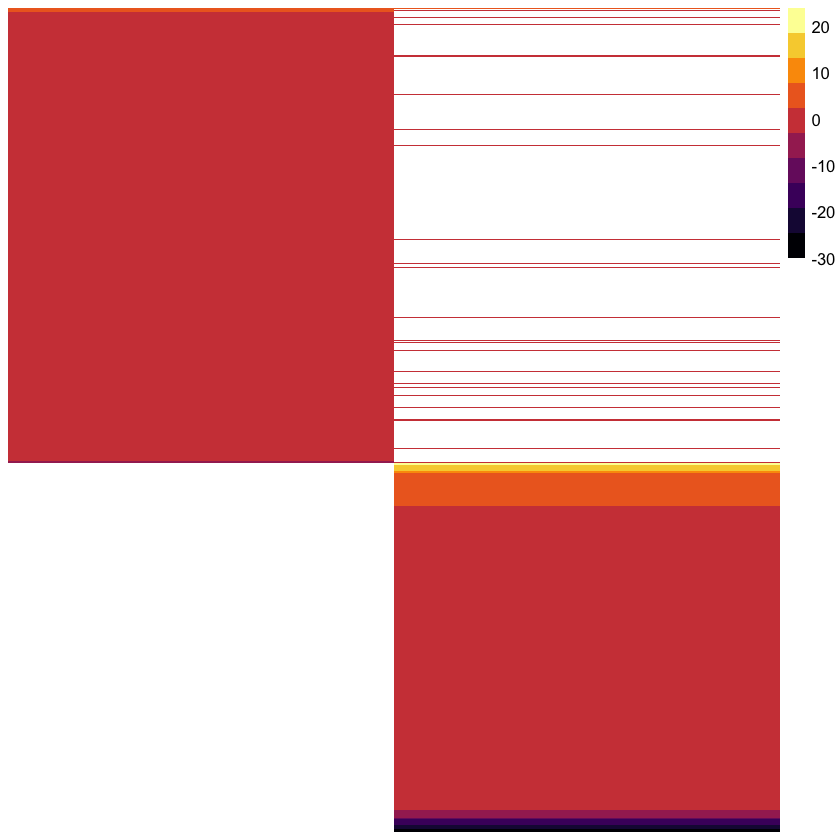

In [30]:
pheatmap(GF_SPF_F_8w_comp, cluster_rows=F, cluster_cols=F, show_rownames=F, show_colnames=F, color=inferno(10))  

## Detailed comparison

- Checking the correlation between the counts of Erny and our counts
- Re-running a DGE analysis on the Erny's raw counts

In [31]:
SPF_F_8w_samples = c('SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2')
GF_F_8w_samples = c('GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2')
SPF_8w_counts = counts[,SPF_F_8w_samples]
GF_8w_counts = counts[,GF_F_8w_samples]

ERROR: Error in counts[, SPF_F_8w_samples]: object of type 'closure' is not subsettable


In [ ]:
# Erny data: counts and try to correlate them with our counts
erny_counts = read.csv("../data/erny_counts.csv")
erny_counts[,1] = capFirst(as.character(erny_counts[,1]))
rownames(erny_counts) = erny_counts[,2]
erny_counts = erny_counts[,c(1,4:17)]
erny_counts[erny_counts[,1] == "1700001c19rik",1] = "1700001C19Rik"
erny_counts[erny_counts[,1] == "Fam125a",1] = "Mvb12a"
erny_counts[erny_counts[,1] == "Sepw1",1] = "Selenow"
erny_counts[erny_counts[,1] == "Ppapdc3",1] = "Plpp7"
erny_counts[erny_counts[,1] == "Ccdc101",1] = "Sgf29"
erny_counts[erny_counts[,1] == "Tcfeb",1] = "Tfeb"
erny_counts[erny_counts[,1] == "2810408m09rik",1] = "Trp53rka"
erny_counts[erny_counts[,1] == "2300009a05rik",1] = "2300009A05Rik"
erny_counts[erny_counts[,1] == "2900010m23rik",1] = "Uqcc2"
erny_counts[erny_counts[,1] == "Ccdc55",1] = "Nsrp1"
erny_counts[erny_counts[,1] == "Phf15",1] = "Jade2"
erny_counts[erny_counts[,1] == "Mobkl2a",1] = "Mob3a"
erny_counts[erny_counts[,1] == "C030046i01rik",1] = "R3hdm4"
erny_counts[erny_counts[,1] == "H2-dmb1",1] = "H2-DMb1"
erny_counts[erny_counts[,1] == "D15ertd621e",1] = "Fam91a1"
erny_counts[erny_counts[,1] == "Bc030336",1] = "BC030336"
erny_counts[erny_counts[,1] == "C330007p06rik",1] = "C330007P06Rik"
erny_counts[erny_counts[,1] == "4931406h21rik",1] = "4931406H21Rik"
erny_counts[erny_counts[,1] == "Gm13253",1] = "Rps15a-ps4"
erny_counts[erny_counts[,1] == "Hiatl1",1] = "Mfsd14b"
erny_counts[erny_counts[,1] == "Bc031353",1] = "Fam214a"
erny_counts[erny_counts[,1] == "Cep110",1] = "Cntrl"
erny_counts[erny_counts[,1] == "B130006d01rik",1] = "B130006D01Rik"
erny_counts[erny_counts[,1] == "D6wsu163e",1] = "D6Wsu163e"
erny_counts[erny_counts[,1] == "Fam82b",1] = "Rmdn1"
erny_counts[erny_counts[,1] == "6030458c11rik",1] = "6030458C11Rik"
erny_counts[erny_counts[,1] == "Smek2",1] = "Ppp4r3b"
erny_counts[erny_counts[,1] == "9330151l19rik",1] = "9330151L19Rik"
erny_counts[erny_counts[,1] == "2010015l04rik",1] = "Cfap74"
erny_counts[erny_counts[,1] == "Ccdc46",1] = "Cep112"
erny_counts[erny_counts[,1] == "4932438a13rik",1] = "4932438A13Rik"
erny_counts[erny_counts[,1] == "B930003m22rik",1] = "Cahm"
erny_counts[erny_counts[,1] == "4933406i18rik",1] = "4933406I18Rik"
erny_counts[erny_counts[,1] == "4933434e20rik",1] = "4933434E20Rik"
erny_counts[erny_counts[,1] == "Ccdc90a",1] = "Mcur1"
erny_counts[erny_counts[,1] == "9930021j03rik",1] = "9930021J03Rik"
erny_counts[erny_counts[,1] == "E030024n20rik",1] = "E030024N20Rik"
erny_counts[erny_counts[,1] == "C78339",1] = "Fam8a1"
erny_counts[erny_counts[,1] == "2700049a03rik",1] = "2700049A03Rik"
erny_counts[erny_counts[,1] == "9530008l14rik",1] = "Adtrp"
erny_counts[erny_counts[,1] == "4930578n16rik",1] = "Ccdc173"
erny_counts[erny_counts[,1] == "Tmem22",1] = "Slc35g2"
erny_counts[erny_counts[,1] == "Fert2",1] = "Fer"
erny_counts[erny_counts[,1] == "D830031n03rik",1] = "D830031N03Rik"
erny_counts[erny_counts[,1] == "A730069n07rik",1] = "Dlc1"
erny_counts[erny_counts[,1] == "1700020d05rik",1] = "1700020D05Rik"
erny_counts[erny_counts[,1] == "Nlrp1c",1] = "Nlrp1c-ps"
erny_counts[erny_counts[,1] == "D3ertd751e",1] = "D3Ertd751e"

In [ ]:
# Extract counts comparable with our counts
comparable = which(erny_counts[,1] %in% rownames(GF_8w_counts))
erny_GF_counts = erny_counts[comparable,c("Symbols",paste("GF_", 1:5, sep=""),paste("GF_", 7:8, sep=""))]
erny_SPF_counts = erny_counts[comparable,c("Symbols",paste("SPF_", 1:4, sep=""),paste("SPF_", 6:8, sep=""))]
# Extract counts comparable with Erny's counts
GF_F_8w_counts = GF_8w_counts[erny_GF_counts[,1],]
SPF_F_8w_counts = SPF_8w_counts[erny_SPF_counts[,1],]
# Check again the genes
genes = which(erny_GF_counts[,1] == rownames(GF_F_8w_counts))
erny_GF_counts = erny_GF_counts[genes,]
erny_SPF_counts = erny_SPF_counts[genes,]
GF_F_8w_counts = GF_F_8w_counts[genes,]
SPF_F_8w_counts = SPF_F_8w_counts[genes,]
sum(erny_SPF_counts[,1] != rownames(SPF_F_8w_counts))
sum(erny_SPF_counts[,1] == rownames(SPF_F_8w_counts))
# Compute correlation between the counts of Erny and ours
sapply(1:dim(SPF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(SPF_F_8w_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(1:dim(GF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_GF_counts)[2], function(x) cor.test(GF_F_8w_counts[,y],erny_GF_counts[,x])$estimate)))
sapply(1:dim(GF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(GF_F_8w_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(2:dim(erny_GF_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(erny_GF_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(1:dim(SPF_F_8w_counts)[2], function(y) return(sapply(2:dim(GF_F_8w_counts)[2], function(x) cor.test(SPF_F_8w_counts[,y],GF_F_8w_counts[,x])$estimate)))

In [ ]:
# Run a DGE expression on the Erny counts
erny_dge_counts = erny_counts[,c(2:15)]
head(erny_dge_counts)
erny_metadata = matrix(c(rep("GF",7),rep("SPF",7)))
colnames(erny_metadata) = c("type")
# Construct DESeqDataSet
erny_dds = DESeqDataSetFromMatrix(
        countData = erny_dge_counts,
        colData = erny_metadata,
        design = ~ type)
# Organize levels of the factors (8w being the reference)
erny_dds$type = relevel(erny_dds$type, ref="SPF")
# Differential expression analysis
erny_dge = DESeq(erny_dds)

In [ ]:
# Extraction of DE genes
erny_dge_res = results(erny_dge, alpha=0.05, test="Wald")
erny_sign_deg = erny_dge_res[which(erny_dge_res$padj < 0.05),]

In [ ]:
# Run a DGE expression on our counts with only the F 8w samples
SPF_GF_8w_F_counts = cbind(GF_8w_counts, SPF_8w_counts)
SPF_GF_8w_F_metadata = matrix(t(sapply(sapply(colnames(SPF_GF_8w_F_counts), strsplit, split = "_"), unlist))[,1])
colnames(SPF_GF_8w_F_metadata) = c("type")
# Construct DESeqDataSet
SPF_GF_8w_F_dds = DESeqDataSetFromMatrix(
        countData = SPF_GF_8w_F_counts,
        colData = SPF_GF_8w_F_metadata,
        design = ~ type)
# Organize levels of the factors
SPF_GF_8w_F_dds$type = relevel(SPF_GF_8w_F_dds$type, ref="SPF")
# Differential expression analysis
SPF_GF_8w_F_dge = DESeq(SPF_GF_8w_F_dds)

In [ ]:
# Extraction of the DE genes
SPF_GF_8w_F_dge_res = results(SPF_GF_8w_F_dge, alpha=0.05, test="Wald")
SPF_GF_8w_F_sign_deg = SPF_GF_8w_F_dge_res[which(SPF_GF_8w_F_dge_res$padj < 0.05),]

In [ ]:
SPF_GF_8w_F_comp = matrix("", nrow=4,ncol=4)
rownames(SPF_GF_8w_F_comp) = c("Original Erny results", "DESeq on Erny counts", "DESeq with only the 8w F", "Full DESeq")
colnames(SPF_GF_8w_F_comp) = rownames(SPF_GF_8w_F_comp)
SPF_GF_8w_F_comp[1,1] = dim(erny_results)[1]
SPF_GF_8w_F_comp[2,2] = dim(erny_sign_deg)[1]
SPF_GF_8w_F_comp[3,3] = dim(SPF_GF_8w_F_sign_deg)[1]
SPF_GF_8w_F_comp[4,4] = length(GF_SPF_F_8w_fc_deg)
SPF_GF_8w_F_comp[1,2] = sum(rownames(erny_sign_deg) %in% erny_results[,2])
SPF_GF_8w_F_comp[1,3] = sum(rownames(SPF_GF_8w_F_sign_deg) %in% erny_results[,1])
SPF_GF_8w_F_comp[1,4] = sum(names(GF_SPF_F_8w_fc_deg) %in% erny_results[,1])
erny_sign_deg_symbols = erny_counts[rownames(erny_sign_deg),1]
SPF_GF_8w_F_comp[2,3] = sum(erny_sign_deg_symbols %in% rownames(SPF_GF_8w_F_sign_deg))
SPF_GF_8w_F_comp[2,4] = sum(erny_sign_deg_symbols %in% names(GF_SPF_F_8w_fc_deg))
SPF_GF_8w_F_comp[3,4] = sum(rownames(SPF_GF_8w_F_sign_deg) %in% names(GF_SPF_F_8w_fc_deg))
SPF_GF_8w_F_comp
#
t1 = rownames(SPF_GF_8w_F_sign_deg[rownames(SPF_GF_8w_F_sign_deg) %in% erny_results[,1],])
t2 = names(GF_SPF_F_8w_fc_deg[names(GF_SPF_F_8w_fc_deg) %in% erny_results[,1]])
sum(t1 %in% t2)
# 
t1 = rownames(SPF_GF_8w_F_sign_deg[rownames(SPF_GF_8w_F_sign_deg) %in% erny_sign_deg_symbols,])
t2 = names(GF_SPF_F_8w_fc_deg[names(GF_SPF_F_8w_fc_deg) %in% erny_sign_deg_symbols])
sum(t1 %in% t2)